In [492]:
# libraries needed for data analysis, pre-processing, visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# output plots right below the cell input command
%matplotlib inline 
# standarization and normalization might be needed
from sklearn.preprocessing import StandardScaler, Normalizer
# libraries needed for training, testing, building the model, and prediction
from sklearn.model_selection import train_test_split
# libraries for the chosen algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
# libraries needed for model tuning
from sklearn.model_selection import GridSearchCV
# libraries needed for evaluation - metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [493]:
# Data collection
# read the csv file and create a dataframe

# overriding column names to a more conventional, understandable one
cols = ['age', 'work_class', 'final_weight', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 
        'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df = pd.read_csv("adult.csv", header = 0, names = cols)
# print the shape of the dataset rows x cols
df.shape

(32561, 15)

In [494]:
# Data analysis and pre-processing
# print information about the dataset
df.info()
# print first 5 rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [495]:
# check for missing values / NA
df.isna().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [496]:
# NA values are the '?' characters if we look closely
# replace those values with actual NA and save the dataset
df.replace('?', np.nan, inplace = True)

In [497]:
# check again for NA values
df.isnull().sum()

age                  0
work_class        1836
final_weight         0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [498]:
# workclass, occupation, and native country should not be dropped, i.e., low percentage of na values relatively to
# the total no. of entries
# so just drop the rows where there are na values
df.dropna(inplace = True)
# check the changes
df.isnull().sum()

age               0
work_class        0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [499]:
# look for duplicated rows
df.duplicated().sum()

23

In [500]:
# drop the row duplicates and save the dataset
df.drop_duplicates(inplace = True)
# check the changes
print(df.duplicated().sum())
# get 5 rows to have a look on the current dataframe
df.head()

0


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [501]:
# reset indexing of rows for avoiding future errors
df.reset_index(drop = True, inplace = True)
df.head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [502]:
# find symmetry, asymmetry in the columns
# find skewness of continous / numerical columns that will help us further to find outliers
df.skew(numeric_only = True)

age                0.528971
final_weight       1.460055
education_num     -0.302845
capital_gain      11.898104
capital_loss       4.524409
hours_per_week     0.332386
dtype: float64

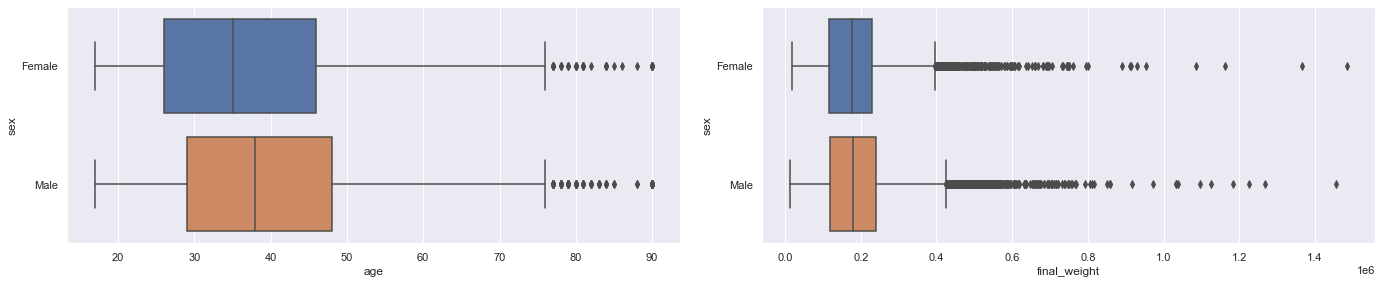

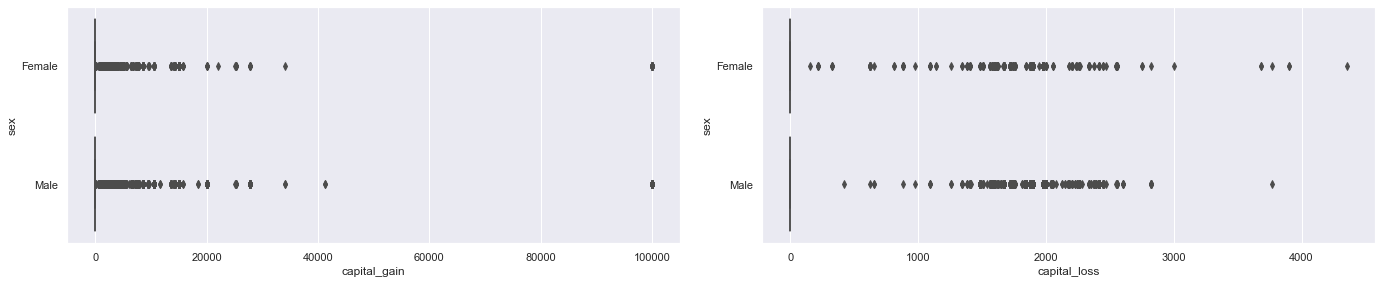

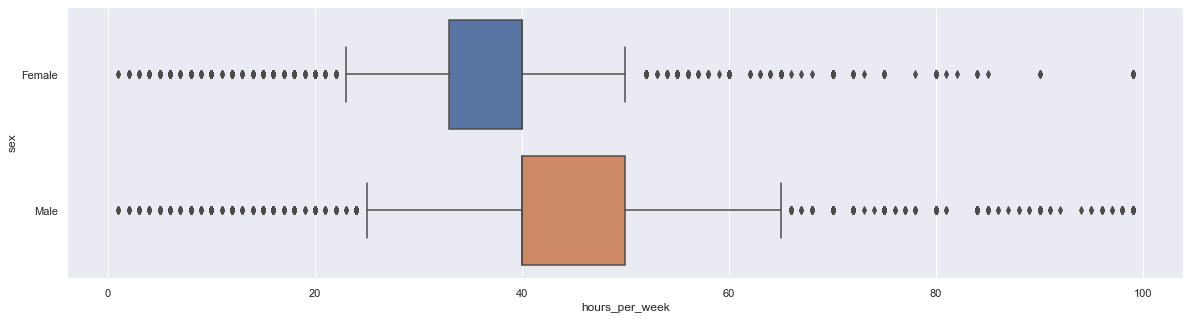

In [503]:
# identifying outliers for age, final_weight, education_num, capital_gain, capital_loss, hours_per_week
# using boxplots 
# from the previous output we deduced that:
# age is moderately skewed
# education_num is fairly symmetrical
# capital_gain is highly skewed
# capital_loss is highly skewed
# hours_per_week is fairly symmetrical
skewedCols = ['age', 'final_weight', 'capital_gain', 'capital_loss', 'hours_per_week']

# for each column print print a boxplot, in this case we want to print 2 boxplots aside
# make a function, because we'll use it later to check the changes
def plotSkewness():
    for i in range(0, len(skewedCols), 2):
        if (i == len(skewedCols) - 1):
            fig, ax = plt.subplots(1, 1, figsize = (20, 5))
            sns.boxplot(data = df, x = skewedCols[i], y = 'sex')
        elif (i >= 0 and i <= len(skewedCols) - 2):
            fig, ax = plt.subplots(1, 2, figsize = (20, 5))
            fig.tight_layout(pad = 5)
            sns.boxplot(data = df, x = skewedCols[i], y = 'sex', ax = ax[0])
            sns.boxplot(data = df, x = skewedCols[i + 1], y = 'sex', ax = ax[1])
plotSkewness()

In [504]:
# after having a clear look on the above graphs, and we can say that skewness of the following cols can be deduced by 
# finding the exact indices of the outliers using the IQR procedure
# of course boxplots helped us (visually) but IQR procedure is the most trustable one / mechanism behind the boxplot

colsOutliers = ['age', 'final_weight']

# create a funcion to automate the process for all cols
def removeOutliers():
    for i in colsOutliers:
        # lower quartile
        Q1 = np.percentile(df[i], 25, interpolation = 'midpoint')
        # upper quartile
        Q3 = np.percentile(df[i], 75, interpolation = 'midpoint')

        # calculate the interquartile
        IQR = Q3 - Q1

        # look for the outliers that are over the maximum score / right whisker  
        upper = np.where(df[i] >= (Q3 + 1.5 * IQR))
        # look for the outliers that are below the minimum score / left whisker  Fax
        lower = np.where(df[i] <= (Q1 - 1.5 * IQR))

        # upper and lower is an array inside of a tuple, just get the array out
        upper = upper[0]
        lower = lower[0]
        
        # remove outliers using the arrays obtained from above
        # removing rows will change indexing, so reset it each time
        df.drop(upper, axis = 0, inplace = True)
        df.drop(lower, axis = 0, inplace = True)
        df.reset_index(drop = True, inplace = True)

removeOutliers()

In [508]:
# capital_gain and capital_loss outliers are a different case
capitalLoss = df.loc[df['capital_loss']]